**GOOGLE DRIVER BAĞLANTI**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/FacialExpressionRecognition')

In [ ]:
!ls 

data	     images	     secondMeeting	    thirdMeeting
fer2013.csv  model_plot.png  speechRecognition.rar  trainModel.ipynb


**VERİ SETİNİN OKUNMASI ve AÇINSAYICI VERİ ÇÖZÜMLEMESİ (Exploratory Data Analysis (EDA))**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/FacialExpressionRecognition"

data = pd.read_csv("/content/drive/MyDrive/FacialExpressionRecognition/fer2013.csv")
print("veri seti tipi", type(data))
print("veri seti boyutu:",data.shape)
print("veri seti dosya boyutu:",data.size)
print(data.head())

veri seti tipi <class 'pandas.core.frame.DataFrame'>
veri seti boyutu: (35887, 3)
veri seti dosya boyutu: 107661
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
nullsEmotion=pd.isnull(data["emotion"])

for i in range(0,35887):
    null = nullsEmotion[i]
    if null == "True":
      print("Null veri bulunmuştur.")
    else:
        pass
print("Emotion Sütununda Null Veri bulunmamıştır.")

Emotion Sütununda Null Veri bulunmamıştır.


In [ ]:
print("Her bir duygudan veri setinde bulunma sayısı")
print(data["emotion"].value_counts())


Her bir duygudan veri setinde bulunma sayısı
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


**DUYGULARA GÖRE VERİ SETİNİN GÖSTERİMİ**

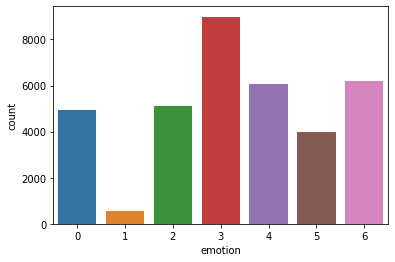

In [ ]:
import seaborn as sns

ax = sns.countplot(x="emotion",data=data)

In [ ]:
print("Veri Seti Dağılım Oranı")
print(data["Usage"].value_counts())

Veri Seti Dağılım Oranı
Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


**TEST, TRAIN ve PRIVATE TEST OLARAK VERİLERİN DAĞILIMI**

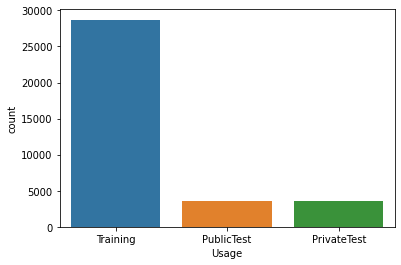

In [ ]:
ax = sns.countplot(x="Usage",data=data)

Sadece **TRAIN** verisetinin Alınması

In [ ]:
train_data = data [data.Usage == "Training"]

In [ ]:

train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


**TRAIN VERİ SETİNİN GÖRSELLEŞTİRİLMESİ**

In [ ]:
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

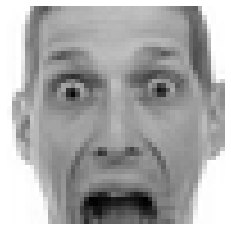

In [ ]:

show(train_images[9])

In [ ]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Farklı yüz ifadelerinin sayısı: %d'%train_labels_count)

Farklı yüz ifadelerinin sayısı: 7




```
# This is formatted as code
```

**One Hot İşleminin Uygulanması**

In [ ]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [ ]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)

y_train = y_train.astype(np.uint8)

print(y_train.shape)
y_train

(28709, 7)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

**TEST VERİ SETİNİN ÖN İŞLEME İŞLEMLERİ**

In [ ]:
np.unique(data["Usage"].values.ravel()) 

print('Test verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

Test verisetindeki örnek sayısı: 3589


In [ ]:
test_data = data[data.Usage == "PublicTest"] 
test_pixels = test_data.pixels.str.split(" ").tolist() 

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(3589, 2304)


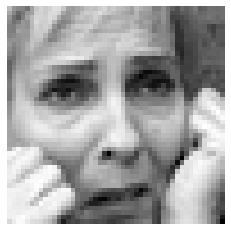

In [ ]:
show(test_images[41])

In [ ]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)
